# Práctica 2 - Clasificación supervisada en scikit-learn



## Minería de Datos 2017/2018 - Jacinto Arias y José A. Gámez

Esta práctica tendrá dos partes:

Primero estudiaremos la API de algunos de los clasificadores más utilizados en `scikit-learn` para conocer los distintos hiperparámetros que los configuran y estudiar los modelos resultantes.

Segundo estudiaremos métodos de selección de modelos, orientados a obtener una configuración óptima de los hiperparámetros para nuestros clasificadores.

In [1]:
# Always load all scipy stack packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

In [2]:
# This code configures matplotlib for proper rendering
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

------------

## Carga de datos

Utilizaremos `iris` como nuestros banco de pruebas.

In [3]:
seed=6342
np.random.seed(6342)

In [4]:
# Update the file path to fit your system
df = pd.read_csv("../data/iris.csv", dtype={ "label": 'category'})
dfAttributes = df.drop('label', 1)
dfLabel = df['label']

In [5]:
# Divide into train/test split for our experiments
from sklearn.model_selection import train_test_split
train_atts, test_atts, train_label, test_label = train_test_split( 
    dfAttributes,
    dfLabel,
    test_size=0.2,
    random_state=seed,
    stratify=dfLabel)

---
## Modelos de clasificación supervisada

### KNN

KNN es un clasificador sencillo de entender y configurar, ya que solo tendremos que fijar el parámetro `k` que determina el número de vecinos con los que compararemos.

Se trata de un algoritmo perezoso, es decir, que no realiza fase de aprendizaje previa porque computa los parámetros necesarios para la clasificación durante el propio proceso de clasificación. Aunque esto pueda parecer una ventaja puede llegar a resultar demasiado pero ineficiente para datos muy grandes. Además, es muy sensible a cambios en los datos de training. 

En `scikit` podemos encontrarlo en el paquete [Docs](http://scikit-learn.org/stable/modules/neighbors.html#classification)

In [6]:
from sklearn import neighbors

y entrenarlo a partir de la siguiente función que presenta muy poca parametrización como era de esperar (en la documentación podéis encontrar opciones avanzadas de parametrización, como diversas métricas para medi las distancias o algoritmos para computarlas). Por defecto usa la distancia euclídea.

```
neighbors.KNeighborsClassifier(
    n_neighbors # numero de vecinos en la clasificación,
    
)
```

Vamos a probar el clasificador con un valor de moderado como `k=5`. Lo primero es configurar el modelo con respecto a los hiperparámetros:

In [10]:
k = 5 #hyperparameters
model = neighbors.KNeighborsClassifier(k)

Ahora aprendemos los parámetros del conjunto de **training**. En el caso del clasificador KNN solo inicializamos su estado, ya que como sabéis es *lazy*.

In [11]:
knn = model.fit(train_atts, train_label) #entrenar modelo

Por último, vamos a validar el modelo. Para ello obtenemos una predición para nuestro conjunto de datos de **test**.

In [12]:
prediction = knn.predict(test_atts) #validar modelo

---
### Métricas en sklearn

En lugar de calcular las métricas directamente podemos utilizar el paquete `sklearn.metrics`que define un gran número de métricas y utilidades [Docs](http://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

Las funciones de métrica que incorpora `sklearn` se utilizan a lo largo de la librería para configurar métodos de evaluación de modelos. Pero también las podemos invocar directamente a partir de un vector de observaciones etiquetas (**ground truth**) y una serie de predicciones obtenidas por un clasificador.

In [13]:
import sklearn.metrics as metrics

In [14]:
# Confusion matrix
metrics.confusion_matrix(test_label, prediction)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

In [15]:
# Accuracy
metrics.accuracy_score(test_label, prediction)

0.96666666666666667

Existen otras muchas métricas, algunas de ellas muy útiles pero no válidas en el caso de problemas con clase no binaria. En este caso hay que destacar una case como *positiva* para poder interpretar la matix de confusión.

In [16]:
# Some synthetic data from an imaginary two label classification problem:
test_label_sample = ['tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_positive', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_positive', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative']
prediction_sample = ['tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_positive', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_positive', 'tested_negative', 'tested_negative', 'tested_negative', 'tested_negative']

In [17]:
# Recall
metrics.recall_score(test_label_sample, prediction_sample, pos_label="tested_positive")

0.5714285714285714

In [18]:
# Precision
metrics.precision_score(test_label_sample, prediction_sample, pos_label="tested_positive")

0.61538461538461542

---
#### De vuelta al KNN

Un aspecto interesante del clasificador KNN es que podemos comprobar el resultado de la clasificación de manera gráfica, ya que podemos representar las distancias. El problema es que el ojo humano solo es capaz de interpretar 3 dimensiones, así que tendremos que conformarnos con representar la partición de distintos cojuntos (pares, en un plano) de atributos.

Para ello vamos a generar un gráfico que obtenga las **fronteras de decisión** para un par de variables.

In [19]:
def classifierPrintBoundaries(model, train_atts, train_label, test_atts, test_label):

    attsPair = [ (x,y) for x in train_atts.columns for y in train_atts.columns if x != y]
    
    for (att1_name, att2_name) in attsPair:
        
        xx, yy = np.meshgrid(np.arange(min(train_atts[att1_name])-1, max(train_atts[att1_name])+1, 0.05),
                             np.arange(min(train_atts[att2_name])-1, max(train_atts[att2_name])+1, 0.05))

        mesh = pd.DataFrame({ 'x' : xx.ravel(), 'y' : yy.ravel() })
        
        cls = model.fit(train_atts[[att1_name, att2_name]], train_label)

        Z = cls.predict(mesh)
        mesh = mesh.assign( label = pd.Categorical(Z, categories=train_label.cat.categories) )

        colors = ["#4D73AB","#54A86F","#C44D54"]

        mesh = mesh.assign(colors = mesh.label.cat.codes.map(lambda x: colors[x]))
        colorBoundary = list(mesh.label.cat.codes.map(lambda x: colors[x]))
        colorObservations = list(test_label.cat.codes.map(lambda x: colors[x]))

        fig, ax = plt.subplots()
        # Plot using Seaborn
        sns.regplot(x='x', y='y', data=mesh,
                   fit_reg=False, 
                   scatter_kws={'color': colorBoundary})

        sns.regplot(x=att1_name, y=att2_name, data=test_atts,
                   fit_reg=False,
                   scatter_kws={'color': colorObservations,  'lw': 1, 'edgecolor':'#FFFFFF'})


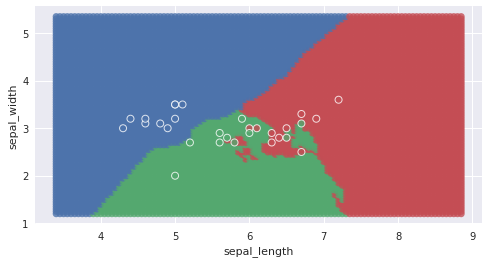

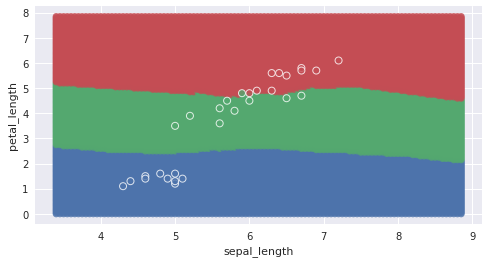

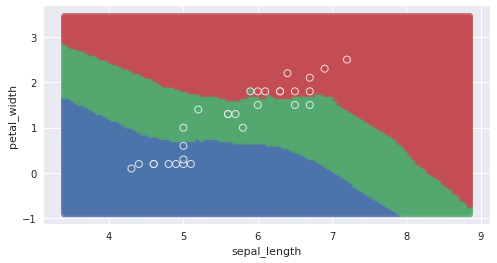

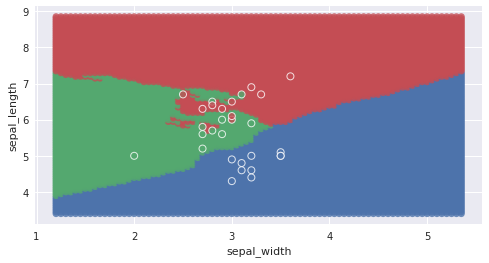

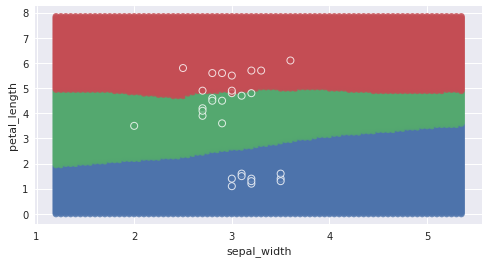

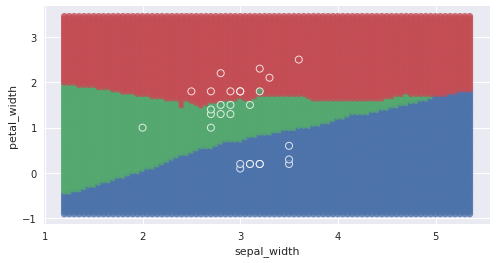

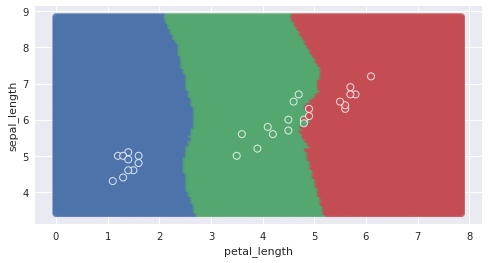

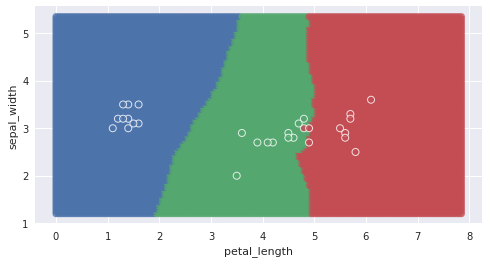

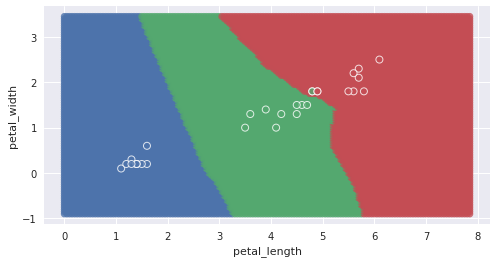

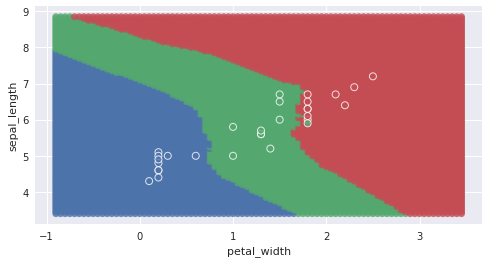

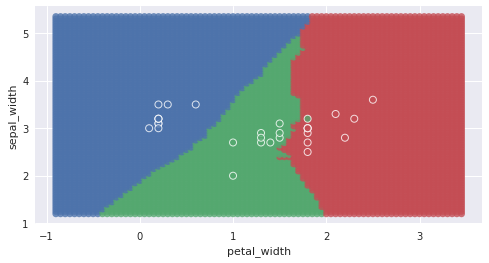

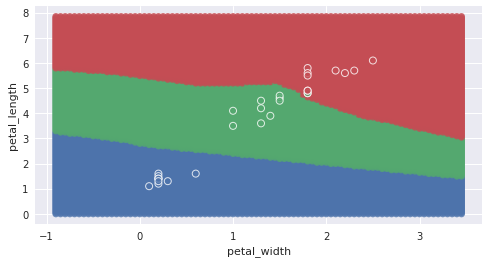

In [21]:
model = neighbors.KNeighborsClassifier(5)
#para ver la frontera de decisión de un clasificador
classifierPrintBoundaries(model, train_atts, train_label, test_atts, test_label)

Podemos observar como el clasificador no descubre fronteras lineales. Comparad estos resultados con los obtenidos mediante el clasificador OneR de la práctica anterior o directamente con el histograma condicionado.

Probad distintas combinaciones para el parámetro `k`y variables.

---
## Árboles de decisión

Ya hemos utilizado árboles de decisión anteriormente, pero ahora que los conocemos más en profundidad vamos a aprender a ajustar los hiperparámetros del algoritmo de aprendizaje, éste es el uso básico del clasificador dentro del funcionamiento de `scikit`:

In [22]:
# Cargamos el arbol de decision
from sklearn import tree

# Iniciamos el modelo
model = tree.DecisionTreeClassifier()

# Entrenamos el modelo
classifier = model.fit(train_atts, train_label)

# Obtenemos la predicción
prediction = classifier.predict(test_atts)

No obstante, la función `DecisionTreeClassifier`, del árbol de decisión presenta una serie de parámetros para ajustar el algoritmo de aprendizaje

```
tree.DecisionTreeClassifier( 

    criterion : "gini" o "entropy"  # Criterio de búsqueda del algoritmo, por defecto usa
                                    # gini, pero nosotros conocemos entropy
                                    
    max_depth : Int o None # Por defecto usa none, y expande el árbol hasta que todos los nodos son hojas
                           # No obstante podemos especificar un entero para evitar que el árbol ramifique
                           # más niveles, útil para controlar el sobreajuste
                           
    min_samples_split : Int # Número minimo de instancias para ramificar un nodo. En caso de que 
                            # se llegue a un nodo que no sea hoja pero número de instancias es menor al
                            # requerido, entonces el algoritmo no ramifica y lo convierte en hoja.
                            # Util para evitar el sobreajuste a modo de poda.
                            
    min_impurity_split: float # Un parámetro de poda que evita ramificar un nodo en el caso de su ganancia
                              # en cuanto a la métrica obtenida sea inferior al umbral establecido
                            
    random_state: Int # Una semilla para controlar que podemos reproducir el resultado
                            
```

Para más información leer la [Documentación](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Visualización del árbol

Python nos permite imprimir los árboles de decisión de manera gráfica usando la librería *graphviz*.

*NOTA* Si no estáis utilizando el entorno de docker provisto es necesario tener los siguientes paquetes instalados.
* Paquete del sistema `graphviz`
* Paquetes de python `pydot` y `pydotplus`


In [23]:
# Print a tree
import pydotplus 
from IPython.display import Image  
def imprimeArbol(model, data, width):
    fnames = data.columns.values[:-1]
    lnames = data['label'].unique()
    dot_data = tree.export_graphviz(model, out_file=None, 
                             feature_names=fnames,  
                             class_names=lnames,  
                             filled=True, rounded=True,  
                             special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    return Image(graph.create_png(), width=width)  

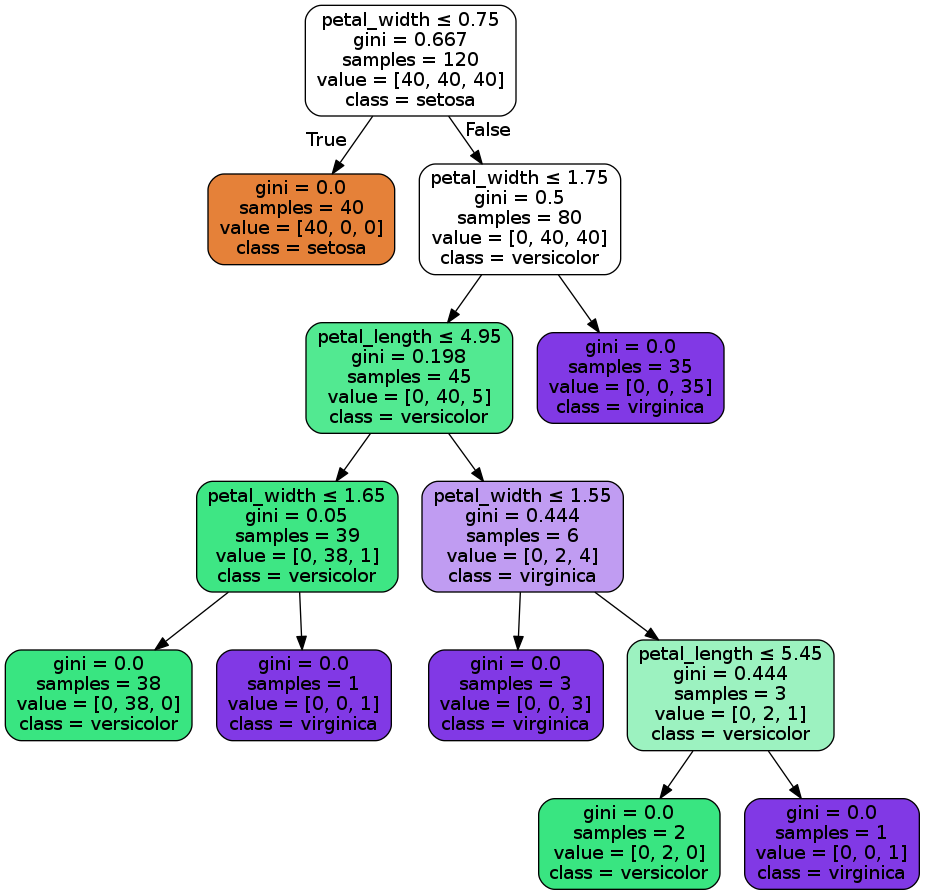

In [24]:
# Params:
arbol = classifier
datos = df
ancho = "500px"
imprimeArbol(arbol, datos, ancho)

*Nota:* Si os sale un arbol muy grande, podéis darle a botón derecho y abrir en otra ventana, donde podreis hacer zoom

Esta es la representación gráfica del árbol que aprendimos antes, en el cual especificamos los hiperparámetros por defecto que tiene el algoritmo. Como podemos ver es un árbol de bastante profundidad que ajusta casi de manera perfecta el conjunto de training.

En cada nodo se nos muestra:

```
(si no es nodo hoja) atributo predictor seleccionado y punto de corte
gini (o entropy): valor de la métrica de ganancia obtenida para el corte
samples: número de muestras obtenidas en esa partición
value: vector distribución de la clase para dichas muestras
class: clase mayoritaria en dicho nodo
```

Como podéis ver, el clasificador ha sobreajustado al máximo los datos de entrenamiento. Para obtener un clasificador con mayor poder de generalización podemos ajustar los parámetros de **regularización**, para que el algoritmo pode algunas ramas:

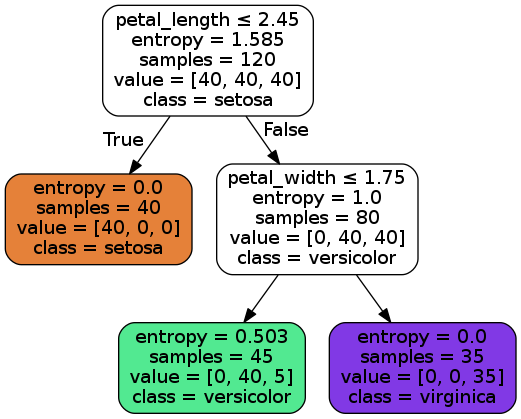

In [25]:
# Config the model
model = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)

# Train the classifier
classifier = model.fit(train_atts, train_label)

# Print it
imprimeArbol(classifier, df, "500px")

Como véis hemos obtenido un modelo mucho más compacto.

¿Cuál es el error del clasificador anterior y de este? ¿Qué modelo crees que es mejor?

También podemos observar la frontera de decisión que es capaz de aprender el clasificador para cada dos variables.

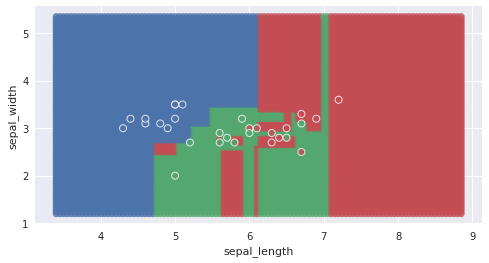

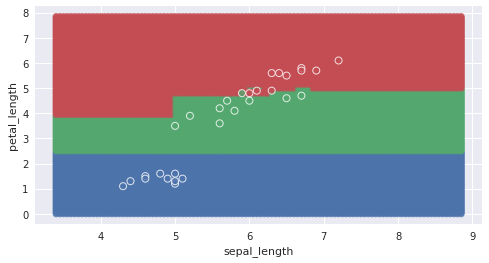

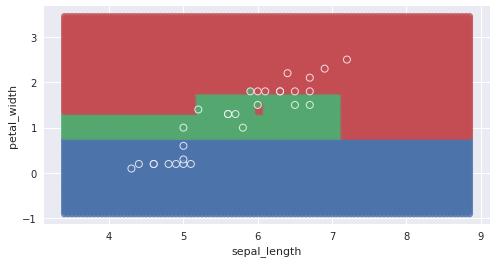

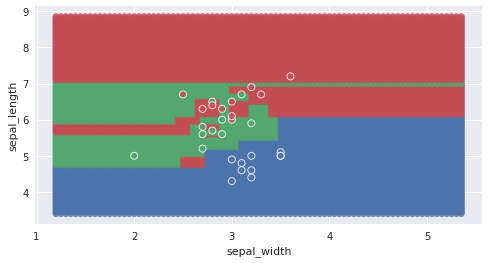

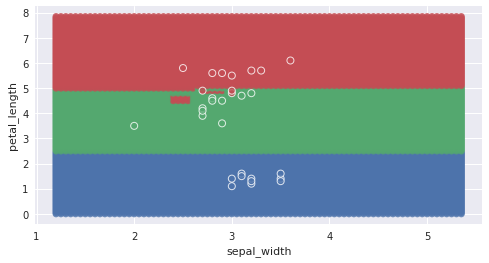

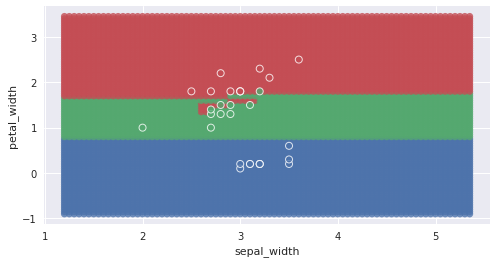

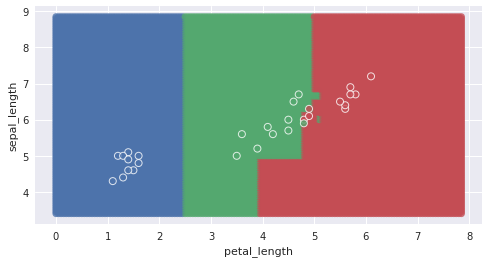

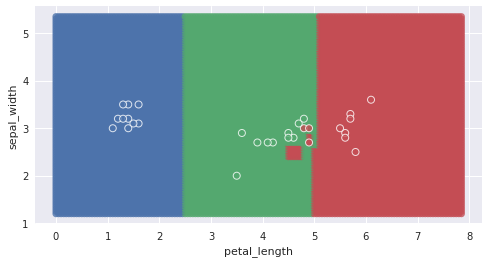

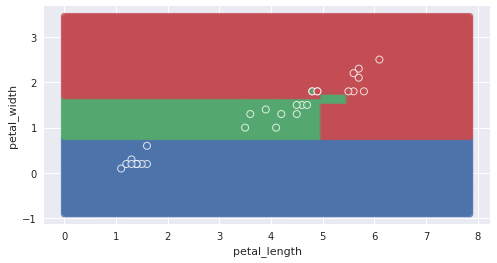

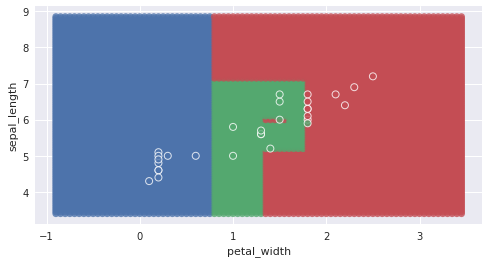

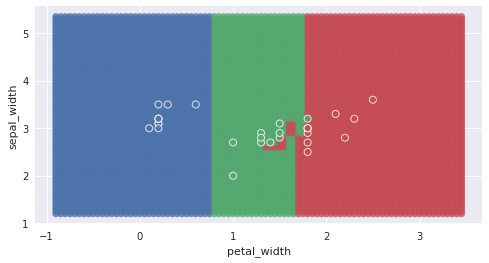

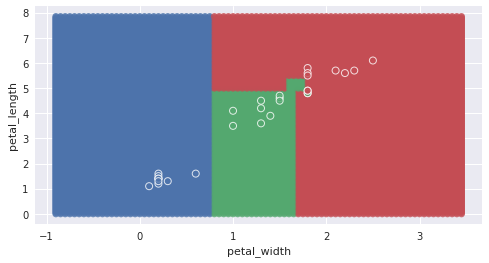

In [26]:
model = tree.DecisionTreeClassifier()
classifierPrintBoundaries(model, train_atts, train_label, test_atts, test_label)

---
## Evaluación de modelos

Hemos visto que a la hora de entrenar un clasificador podemos parametrizar el algoritmo de aprendizaje. En este caso nos debe surgir una gran duda ¿Cuál es el mejor clasificador para mi problema?, ¿Cuál es su mejor configuración para mi problema?,

Para responder a estas preguntas lo más lógico sería realizar una serie de experimentos para evaluar distintos modelos y quedarnos con el **mejor**. No obstante, hemos de realizar dichas pruebas con una metodología que garantice que los resultados no están sesgados.

Una de lás técnicas más utilizadas para ello es la **validación cruzada**, en la que separamos en `k` muestras nuestros datos y repetimos `k`veces el proceso de aprendizaje y validación utilizando cada vez una combinación única de `k-1` muestras para entrenar y la restante para validar nuestros datos.

El resultado es la media de las métricas obtenidas, al repetir y agregar los resultados del aprendizaje sobre varios conjuntnos de datos nos aseguramos una buena estimación del sesgo y la varianza.

El algoritmo básico de selección de modelos consiste en probar distintas combinaciones utilizando validación cruzada y quedarnos con la mejor de ellas.

Para utilizar la validación cruzada **estratificada** en scikit podemos usar el siguiente paquete:

In [27]:
from sklearn.model_selection import cross_val_score

```
cross_val_score(
    estimator = el clasificador a utilizar, 
    X = data frame con los attributos,
    y = vector con la clase,
    scoring = la metrica que mediremos (del paquete metrics), 
    cv = numero de folds
)
```

Su uso es sencillo, basta con configurar un clasificador e iniciar el proceso. 3, 5 o 10 suelen ser valores razonables para el número de folds.

In [28]:
dt1 = tree.DecisionTreeClassifier()
scores = cross_val_score(estimator=dt1, X=dfAttributes, y=dfLabel, scoring="accuracy", cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #media e intervalo de confianza

Accuracy: 0.95 (+/- 0.09)


In [29]:
dt2 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
scores = cross_val_score(estimator=dt2, X=dfAttributes, y=dfLabel, scoring="accuracy", cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.10)


Vemos que ambos clasificadores son prácticamente idénticos. En ocasiones, además de la calidad de la clasificación es importante conocer la eficiencia de los algoritmos, ya que esta también puede influir mucho en nuestra decisión.

Existe una forma elegante de medir el tiempo en jupyter con las funciones `%magics` en las que puedes especificar diversas operaciones para el sistema. [Documentación](http://ipython.readthedocs.io/en/stable/interactive/magics.html)

Concretamente utilizaremos %timeit para hacer profiling del tiempo de ejecución.

**EJEMPLO**

In [31]:
# This code sorts an array of 5000 elements
test = [np.random.uniform() for x in range(5000)]

# Using timeit we run the code n times and it returns the average time
%timeit -n 1000 sorted(test)

1.22 ms ± 31.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Podéis aprovechar esta funcionalidad para medir y reportar el tiempo de ejecución de los clasificadores.

### Construcción y validación del modelo final A FUEGO

En un entorno de producción es importante saber que finalmente deberás construir un clasificador que será el que despliegues y uses para clasificar nuevos datos.

Es importante que después de un proceso de validación cruzada podamos obtener un modelo final y una medida generalizada de su rendimiento.

¿Cómo hacemos esto?, hay dos problemas a resolver:

1) La validación cruzada crea `k` modelos, ¿con cuál nos quedamos?
2) El score obtenido en la media de la validación cruzada, o para un fold concreto, está sesgado al propio proceso de validación.

La solución pasa por reservar un conjunto de datos de test que se quedará fuera de la validación cruzada, y por lo tanto **nunca será observado** por el algoritmo de aprendizaje. De este modo, realizaremos la validación cruzada a partir de los datos de training para seleccionar nuestro modelo.

Una vez obtenido el modelo (la configuración de hiperparametros) que ha maximizado la validación cruzada utilizaremos el conjunto de training para entrenar un clasificador final a partir de dicha configuración. Para validar este clasificador y obtener una métrica no sesgada de su rendimiento utilizaremos el conjunto de test que separamos al principio y que constituye una muestra de datos que nuesto algoritmo nunca ha visto.

### Preprocesamiento de los datos durante la validación cruzada (transformers y pipelines)

Como ya sabéis, es muy importante que si ejecutáis algoritmos de preprocesamiento de los datos lo hagáis siempre de manera correcta, entrenando los parámetros sobre el training y preprocesando training y test con dichos parámetros.

Si vamos a utilizar un algoritmo de preprocesamiento es muy importante que lo incluyamos en el proceso de validación cruzada. En el caso de scikit podemos hacerlo mediante  `pipelines`.

Scikit pone a nuestra disposición toda una bateria de algoritmos de preprocesado en la sección `data transformation` [Dcos](http://scikit-learn.org/stable/data_transforms.html#data-transforms). Estos algoritmos tienen una API idéntica a la de un clasificador (se parametriza el modelo, se entrena contra unos datos y se aplica sobre los conjuntos que queramos).

Gracias a las `pipelines` podemos construir procesos contínuos de preprocesado/entrenamiento en los que definimos una serie de algoritmos de preprocesado y el modelo a aprender, todo parametrizado conforme convenga. Este proceso podemos introducirlo a modo de **estimador** en cualquier algoritmo de validación cruzada de scikit, y el mismo entrenará y validará los datos de una manera metodológicamente correcta.


Por ejemplo tenemos una transformación para eliminar valores perdidos:

In [32]:
from sklearn.preprocessing import Imputer

```
Imputer(
    missing_values=’NaN’, # El valor con el que se representan los valores perdidos en el data frame
    strategy=’mean’,  # Con que estadístico los sustituimos,
    axis=0, # Sobre que eje realizamos la sustitución
)
```

Vamos a simular un dataset con datos perdidos eliminado aleatoriamente algunos valores

In [33]:
missingDf = df.copy()
attributes = missingDf.drop('label', 1)
import random
ix = [(row, col) for row in range(attributes.shape[0]) for col in range(attributes.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    missingDf.iat[row, col] = np.nan
    
dfAttributesMissing = missingDf.drop('label', 1)
dfLabelMissing = missingDf['label']

train_attsMissing, test_attsMissing, train_labelMissing, test_labelMissing = train_test_split( 
    dfAttributesMissing, # Dataset con los atributos
    dfLabelMissing, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=dfLabelMissing) # Variable a estratificar

In [34]:
train_attsMissing.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,87.000000,87.000000,77.000000,81.000000
mean,5.839080,3.071264,3.900000,1.191358
std,0.831552,0.476154,1.742503,0.792022
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.700000,0.300000
50%,5.700000,3.000000,4.300000,1.400000
75%,6.350000,3.400000,5.100000,1.900000
max,7.900000,4.400000,6.700000,2.500000


Ahora construimos el modelo de preprocesado, lo entrenamos y lo aplicamos a los datos de entrenamiento y training

In [35]:
# First we define the model
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Then we fit it
imp = imp.fit(train_attsMissing)

# Finally we can use it to transform any dataframe:
X = imp.transform(train_attsMissing)

# The result is a matrix, so we should make it back into a dataframe
train_attsFull = pd.DataFrame(X, columns = train_attsMissing.columns)

train_attsFull.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.00000,90.000000
mean,5.839080,3.071264,3.90000,1.191358
std,0.817417,0.468060,1.61022,0.750909
min,4.400000,2.200000,1.00000,0.100000
25%,5.125000,2.800000,3.07500,0.325000
50%,5.750000,3.000000,4.00000,1.300000
75%,6.300000,3.400000,5.10000,1.800000
max,7.900000,4.400000,6.70000,2.500000


Podemos automatizar este proceso con una pipeline y usarlo además como estimador de entrada en una validación cruzada.

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
# We define the pipeline as a set of tuples
estimator = Pipeline([("imputer", Imputer(missing_values='NaN',
                                          strategy="mean",
                                          axis=0)),
                      ("tree", tree.DecisionTreeClassifier())])

In [38]:
# We can fit and use the pipeline as usual
cls = estimator.fit(train_attsMissing, train_labelMissing)
prediction = estimator.predict(test_attsMissing)
metrics.accuracy_score(test_labelMissing, prediction)


0.93333333333333335

In [39]:
# Or we can use it as the input of a cross-val scorer
cross_val_score(estimator, train_attsMissing, train_labelMissing).mean()

0.93333333333333324

---
## Selección de modelos

Ahora que somos capaces de evaluar correctamente los clasificadores es importante decidir una estrategia que nos permita encontrar una configuración óptima de los parámetros. Para ello combinaremos un algoritmo de búsqueda con la evaluación mediante validación cruzada para explorar el espacio de las distintas configuraciones de hiperparámetros que proveen los algoritmos de aprendizaje.

Cuando se tiene cierta experiencia usando estos modelos es posible determinar los dominios aproximados en los que se encuentran los valores *relevantes* que puede tomar un algoritmo. Por ejemplo, en un `Random Forest` se suelen utilizar un número de modelos entre 50 y 200 en función del problema que estemos afrontando.

No obstante, es un proceso de ensayo, error e intuición que debemos adquirir, así que es razonable explorar configuraciones de todo tipo y estudiar el resultado.

El algoritmo básico de selección de modelos por *fuerza bruta* se llama **grid search** (producto cartesiano) y está implementado en scikit en el paquete:

In [40]:
from sklearn.model_selection import GridSearchCV

Este algoritmo recibe un *grid* de parámetros y realiza una búsqueda exhaustiva evaluando mediante validación cruzada todas las posibles combinaciones existentes.

```
GridSearchCV(
    estimator # El algoritmo de aprendizaje a optimizar, 
    param_grid # Un diccionario con los nombres de los parámetros y los valores a considerar, 
    scoring  # La métrica a optimizar, 
    cv # Numero de folds en la validación cruzada
)
```

Un ejemplo básico sería optimizar el parámetro `k`para un knn usando una 10cv:

In [41]:
clf = GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = { 'n_neighbors' : [1,2,3,4,5] },
    scoring = 'accuracy',
    cv = 10
)

fitted = clf.fit(train_atts, train_label)

In [42]:
# Get the best configuration
fitted.best_params_

{'n_neighbors': 1}

In [43]:
# Get the mean score for each cv
means = fitted.cv_results_['mean_test_score']
# Get the sd score for each cv
stds = fitted.cv_results_['std_test_score']
# Get each specific configuration
conf = fitted.cv_results_['params']

# Print the three things togheter
for mean, std, params in zip(means, stds, conf):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.958 (+/-0.083) for {'n_neighbors': 1}
0.958 (+/-0.083) for {'n_neighbors': 2}
0.958 (+/-0.112) for {'n_neighbors': 3}
0.958 (+/-0.112) for {'n_neighbors': 4}
0.958 (+/-0.112) for {'n_neighbors': 5}


Podemos utilizar directamente el resultado como si fuese el clasificador entrenado sobre todos los datos para evaluarlo contra el conjunto de test:

In [44]:
prediction = clf.predict(test_atts)

In [45]:
metrics.confusion_matrix(test_label, prediction)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [46]:
metrics.accuracy_score(test_label, prediction)

0.96666666666666667

### Otros algoritmos de selección de modelos

Para dominios demasiado grandes y clasificadores costosos de entrenar, la búsqueda por fuerza bruta puede resultar demasiado costosa. Es por ello que en ocasiones se utilizan algoritmos de búsqueda heurística e incluso aleatorios.

Scikit proporciona un algoritmo de *grid search* randomizado, donde el grid de parametros se puede especificar como una distribución sobre la que muestrear configuraciones candidatas:

`sklearn.model_selection.RandomizedSearchCV`

Podéis encontrar la documentación aquí [Docs](http://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search)

## Trabajo autónomo

#### 1. Lectura y estudio

En esta práctica debéis estudiar cuidadosamente la documentación en esta libreta y es muy recomendable leerse las páginas de ejemplo y teoría de los distintos clasificadores y métodos de validación del manual de scikit. Encontraréis que es una lectura ligera y muy isntructiva:

* [KNN](http://scikit-learn.org/stable/modules/neighbors.html)
* [Decision Tree](http://scikit-learn.org/stable/modules/tree.html)
* [Cross Validation](http://scikit-learn.org/stable/modules/cross_validation.html)
* [Grid Search](http://scikit-learn.org/stable/modules/grid_search.html)


#### 2. Selección de modelos

* Realizar un experimento usando el algoritmo GridSearch de scikit para encontrar la configuración óptima de un clasificador KNN y de un árbol de decisión para los datasets disponibles en la página de la asignatura.
* Estudiar y comparar los resultados de ambos clasificadores para determinar cuál es mejor.
* Estudiar invidualmente los algoritmos.
    * Estudiar los parámetros aprendidos por el clasificador KNN y comprender sus fronteras de decisión.
    * Estudiar los parámetros aprendidos por el árbol de decisión, estudiar su estructura y sus fronteras de decisión. En el caso de los árboles de decisión comparar las estructuras del clasificador con la configuración óptima y         otro con una configuración suboptima.
* Implementar GridSearch de manera manual y ejecutar el experimento para el árbol de decisión. Aquí valoraré principalmente que metodológicamente el algoritmo sea correcto. ES UN BUCLE FOR (MIRAR ALGORITMO SCIKIT Y HACER PRODUCTO CARTESIANO, USAR TRAIN Y TEST)
* ¡Atención! Debéis garantizar que vuestro código sea lo más reproducible posible, durante el desarrollo de la práctica pondré a vuestra disposición nuevos datasets que tendréis que incluir en la libreta. Vuestro código debería ser capaz de añadirlos a la experimentación sin mucho esfuerzo.


#### 3. Estudio de un kernel de kaggle.

[Kaggle lernels](https://www.kaggle.com/kernels)

* Registrarse en kaggle y aprender sobre la plataforma.
* Navegar por los distintos datasets públicos que hay en la plataforma y ver los kernels más populares, seleccionar uno, preferiblemente en python y estudiarlo. Tendréis que presentarmelo en la defensa de la práctica, se valorará positivamente reproducirlo en vuestro propio entorno.

#### 4. Extras

Estos items están pensados para aquellos a los que les interese el tema o quieran ampliar la práctica.

* Probar el algoritmo RandomizedSearchCV (es practicamente idéntico a grid search)
* Añadir un nuevo tipo de modelo a vuestro experimento (logit, svm...). Ojo!, si lo incluís en la práctica tendréis que explicármelo.